# Phase 1 Project

## 1. Business Understanding

The head of Microsoft needs to know what types of films are trending so that they can be at the top of the game when opening their new movie studio
### Some of the questions to be answer
1. What are the top 5 genres currently trending?
2. What genres generate the highest gross
3. What is the average time of movies?

## 2. Data Understanding

#### Understanding bom.movie_gross.csv data

In [1]:
import pandas as pd

bom_movie_gross_df = pd.read_csv('data/bom.movie_gross.csv/bom.movie_gross.csv') # Reading into the first dataset

In [2]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom_movie_gross_df.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [4]:
bom_movie_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
bom_movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


#### Understanding im.db data

In [6]:
import sqlite3
conn = sqlite3.connect('data/im.db/im.db')

In [7]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
imdb_tables = pd.read_sql(query, conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [8]:
for imdb_table_name in imdb_tables['name']:
    cursor = conn.cursor()
    query = f"SELECT * FROM {imdb_table_name} LIMIT 5;"
    cursor.execute(query) # helps execute and retrieve data
    imdb_data_df = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
    print(f"Table: {imdb_table_name}")
    print(imdb_data_df)
    print("-" * 50)

Table: movie_basics
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
--------------------------------------------------
Table: directors
    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540

Focusing on two tables movie_basics and movie_ratings because movie basics shows the different types of genres as well as the runtimes and movie_ratings shows the average ratings

In [9]:
table_names = ['movie_ratings', 'movie_basics']
for table_name in table_names:
    query = f"SELECT * FROM {table_name} LIMIT 5;"
    cursor = conn.cursor()
    cursor.execute(query)
    
    # Fetch the sample data and load into a DataFrame
    imdb_df = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
    
    print(f"Table: {table_name}")
    print(imdb_df)
    print("-" * 50)

# # Close connection 
# conn.close()

Table: movie_ratings
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21
--------------------------------------------------
Table: movie_basics
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                

## 3. Data Preparation

After understanding the  bom_movie_gross.csv data, I decided to check for missing or inconsistent values in the data.
I have created a function which checks for missing values in both the bom.movie_gross_df and the imdb_df Dataframes

In [10]:
def print_missing_values(dataframe):
    missing_value_total = dataframe.isnull().sum()
    print(missing_value_total)

In [11]:
print_missing_values(bom_movie_gross_df)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


I realized that foreign gross has a high number of missing values so I made the decision to add zeros to all the rows that had a null value. I made the assumption that those particular movies did not receive any foreign_gross that year.
I also made the decision to fill the studio missing valuse with 'Not Available' just to indicate that there was no information for those studio names
I also filled the domestic_gross with zeros to indicated that those movies did not receive any domestic_gross 

In [12]:
def fill_missing_values(dataframe, column, fill_value):
    dataframe[column] = dataframe[column].fillna(fill_value)
    return dataframe

In [13]:
bom_movie_gross_df = fill_missing_values(bom_movie_gross_df, 'foreign_gross', 0)
bom_movie_gross_df = fill_missing_values(bom_movie_gross_df, 'studio', 'Not Available')
bom_movie_gross_df = fill_missing_values(bom_movie_gross_df, 'domestic_gross', 0)

print("Updated DataFrame:")
print(bom_movie_gross_df)

Updated DataFrame:
                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     for

In [14]:
print_missing_values(bom_movie_gross_df)

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


After understanding the imdb data, I decided to check for missing values in the tables of movie_basics and movie_ratings.


In [15]:
print_missing_values(imdb_df)

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    1
genres             0
dtype: int64


I realized that runtime_minutes has one row that has a missing value so i decided to drop that row 

In [16]:
imdb_df = imdb_df.dropna(subset=['runtime_minutes'])

In [17]:
print_missing_values(imdb_df)

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


## 4. Data Analysis

Here I am doing my analysis on of the questions set in the Business Understanding:
1. What are the top 5 genres currently trending?
- The data being used in this analysis is the im.db where I'll be using the two tables prepared above; movie_basics and movie_ratings
- Joined the two tables movie_basics and movie_ratings based on the movie_id key

In [18]:
query = '''SELECT mb.movie_id, mb.primary_title, mb.genres, mr.averagerating, mr.numvotes
            FROM movie_basics AS mb
            JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id''' 


combined_movie_df = pd.read_sql(query, conn)
conn.close()

print('Combined DataFrame')
print(combined_movie_df.head())

Combined DataFrame
    movie_id                    primary_title                genres  \
0  tt0063540                        Sunghursh    Action,Crime,Drama   
1  tt0066787  One Day Before the Rainy Season       Biography,Drama   
2  tt0069049       The Other Side of the Wind                 Drama   
3  tt0069204                  Sabse Bada Sukh          Comedy,Drama   
4  tt0100275         The Wandering Soap Opera  Comedy,Drama,Fantasy   

   averagerating  numvotes  
0            7.0        77  
1            7.2        43  
2            6.9      4517  
3            6.1        13  
4            6.5       119  


- Since the genres are stored as a list of many genres in a row, it is necessary to split them into individual rows
- I will also group the Combined DataFrame by genre and calculate the average ratings of each genre as well as the total number of votes
- Then sort to get the top 5 genres by average ratings and the top 5 genres by total number of votes
- The results indicate that the top 5 genres by average ratings include: Short, Documentary, Game-Show, News, Biography, while the top 5 genres by total number of votes include: Drama, Action, Adventure, Comedy, Thriller.


In [19]:
combined_movie_df['genres'] = combined_movie_df['genres'].str.split(',')
combined_movie_df = combined_movie_df.explode('genres')

genre_stats = combined_movie_df.groupby('genres').agg({
    'averagerating': 'mean',
    'numvotes': 'sum'
}).reset_index()

# Sort by average rating and total number of votes to get the top 5 genres
top_genres_by_rating = genre_stats.sort_values(by='averagerating', ascending=False).head(5)
top_genres_by_votes = genre_stats.sort_values(by='numvotes', ascending=False).head(5)

print("\nTop 5 Genres by Average Rating:")
print(top_genres_by_rating)

print("\nTop 5 Genres by Total Number of Votes:")
print(top_genres_by_votes)


Top 5 Genres by Average Rating:
         genres  averagerating  numvotes
21        Short       8.800000         8
7   Documentary       7.332090   4739345
11    Game-Show       7.300000      3469
17         News       7.271330    123319
4     Biography       7.162274  21609446

Top 5 Genres by Total Number of Votes:
       genres  averagerating   numvotes
8       Drama       6.401559  119567500
0      Action       5.810361  101161682
2   Adventure       6.196201   84232589
5      Comedy       6.002689   74305805
23   Thriller       5.639114   48155313


2. What genres generate the highest gross?
- The data being used is a combination of bom.movie_gross.csv data and the im.db data.
- The reason for the merged DataFrames is because the imdb_df contains the list genres while the bom_movie_gross_df contains the domestic and foreign gross data.
- I am merging the two dataframes using the primary key title and primary_title respectively. This is after I saw those that both columns don't have missing values as well as both columns are unique to the whole table.
- From the results its evident that the highest domestic gross is 415000000.0 while foreign gross is 652000000.0
- We can also see that the top 5 highest generating genres is: Action, Adventure, Animation, Biography and Comedy

In [20]:
# Merge the datasets
merged_df = pd.merge(bom_movie_gross_df, combined_movie_df, left_on='title', right_on='primary_title', how='inner')

# Split genres and explode the DataFrame
merged_df['genres'] = merged_df['genres'].str.split(',')
exploded_df = merged_df.explode('genres')

# Convert foreign_gross to string, remove commas, and convert to float
exploded_df['foreign_gross'] = exploded_df['foreign_gross'].astype(str).str.replace(',', '')
exploded_df['foreign_gross'] = exploded_df['foreign_gross'].replace('', 0).fillna(0).astype(float)

# Display the DataFrame after processing foreign_gross
print("\nExploded and Cleaned DataFrame:")
display(exploded_df.head())

# Calculate total gross for each genre
exploded_df['total_gross'] = exploded_df['domestic_gross'] + exploded_df['foreign_gross']
genre_gross = exploded_df.groupby('genres')['total_gross'].sum().reset_index()

# Display the genre gross DataFrame
print("\nTotal Gross by Genre DataFrame:")
display(genre_gross.head())

# Sort values for better visualization
genre_gross = genre_gross.sort_values(by='total_gross', ascending=False)


Exploded and Cleaned DataFrame:


,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Adventure,8.3,682218
1,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Animation,8.3,682218
2,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Comedy,8.3,682218
3,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Action,8.8,1841066
4,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Adventure,8.8,1841066



Total Gross by Genre DataFrame:


,genres,total_gross
0,Action,1.063727e+11
1,Adventure,1.194914e+11
2,Animation,3.879844e+10
3,Biography,1.310094e+10
4,Comedy,7.714817e+10


3. What is the average time of movies?
- Using the start_year column and runtime_minutes column of the imdb_df dataframe I calculated the mean runtime for each year.
- This is so that I can understand what is the average runtime_minutes in each year. 2013 recorded the highest runtime_minutes of around 175.0 min while the lowest recorded runtime_minutes is 80 in 2017.
- I also calcultated the 25th and the 75th percentile of the runtime_minutes where majority of movies fall which is 105.5 mins and 135.25 mins.
- On average, movies should have runtime_minutes of 122.75 mins

In [21]:
# Calculate the average runtime for each year
average_runtime_per_year = imdb_df.groupby('start_year')['runtime_minutes'].mean()

# Calculate overall average runtime
overall_average_runtime = imdb_df['runtime_minutes'].mean()

# Determine the range of runtimes where the majority of movies fall
common_runtime_range = (imdb_df['runtime_minutes'].quantile(0.25), imdb_df['runtime_minutes'].quantile(0.75))

# Print the results
print("Average Movie Runtime by Year:")
print(average_runtime_per_year)
print("\nOverall Average Runtime of movies:", overall_average_runtime, "minutes")
print("\nCommon Runtime Range (25th to 75th percentile):", common_runtime_range, "minutes")


Average Movie Runtime by Year:
start_year
2013    175.0
2017     80.0
2018    122.0
2019    114.0
Name: runtime_minutes, dtype: float64

Overall Average Runtime of movies: 122.75 minutes

Common Runtime Range (25th to 75th percentile): (105.5, 135.25) minutes


## 5. Visualization

- The visualization below showcases two bar graphs in one figure: Top 5 genres by Average Rating and Top 5 Genres by Total Number of Votes.
- 

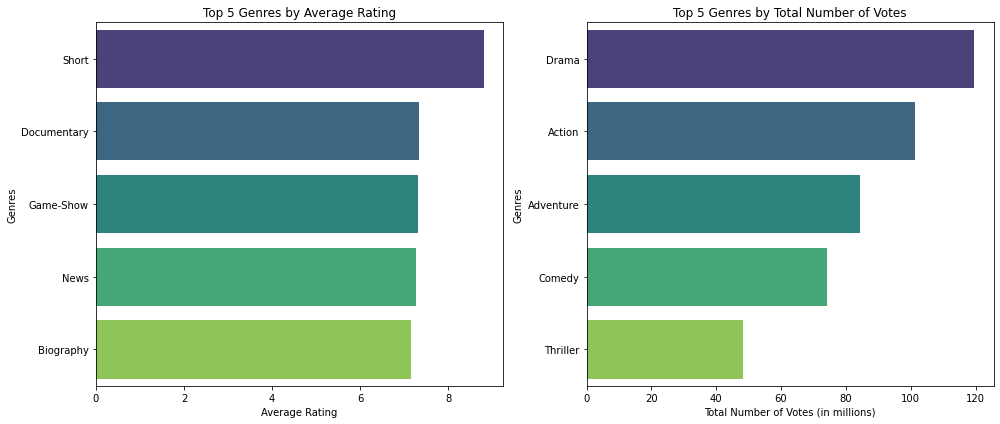

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Bar plot for Top 5 Genres by Average Rating
plt.subplot(1, 2, 1)
sns.barplot(x='averagerating', y='genres', data=top_genres_by_rating, palette='viridis')
plt.title('Top 5 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genres')

# Bar plot for Top 5 Genres by Total Number of Votes
plt.subplot(1, 2, 2)
top_genres_by_votes['numvotes'] = top_genres_by_votes['numvotes'] / 1e6  # Convert to millions
sns.barplot(x='numvotes', y='genres', data=top_genres_by_votes, palette='viridis')
plt.title('Top 5 Genres by Total Number of Votes')
plt.xlabel('Total Number of Votes (in millions)')
plt.ylabel('Genres')

plt.tight_layout()
plt.show()

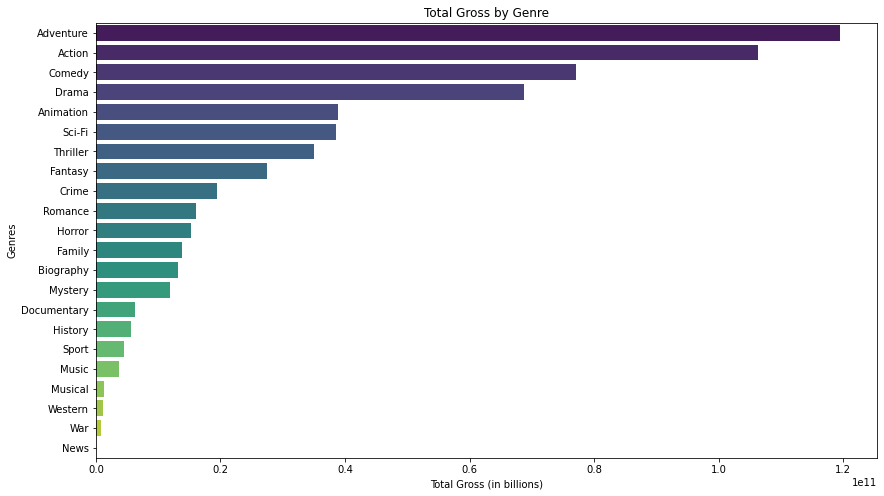

In [23]:
# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='total_gross', y='genres', data=genre_gross, palette='viridis')
plt.title('Total Gross by Genre')
plt.xlabel('Total Gross (in billions)')
plt.ylabel('Genres')
plt.show()

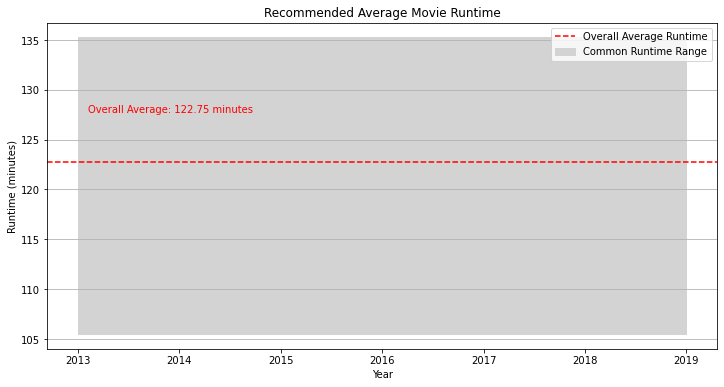

In [24]:
# Calculate the overall average runtime
overall_average_runtime = imdb_df['runtime_minutes'].mean()

# Determine the common runtime range (25th to 75th percentile)
common_runtime_range = (imdb_df['runtime_minutes'].quantile(0.25), imdb_df['runtime_minutes'].quantile(0.75))

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot a horizontal line for the overall average runtime
plt.axhline(y=overall_average_runtime, color='red', linestyle='--', label='Overall Average Runtime')

# Fill the area between the common runtime range
plt.fill_between([min(imdb_df['start_year']), max(imdb_df['start_year'])], common_runtime_range[0], common_runtime_range[1], color='lightgrey', label='Common Runtime Range')

# Writing the average time in the graph
plt.text(min(imdb_df['start_year']) + 0.1, overall_average_runtime + 5, f'Overall Average: {overall_average_runtime:.2f} minutes', color='red')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Runtime (minutes)')
plt.title('Recommended Average Movie Runtime')

# Add legend
plt.legend()

# Show plot
plt.grid(axis='y')
plt.show()

